<a href="https://colab.research.google.com/github/yadugirirajiv/AIML/blob/main/aiml_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_openml

car_data = fetch_openml(name='car', version=2,parser='auto')

In [4]:
type(car_data)

sklearn.utils._bunch.Bunch

In [5]:
car_data.details['version']

'2'

In [6]:
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [7]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [8]:
car_data = car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [9]:
type(car_data)

pandas.core.frame.DataFrame

In [10]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(car_data, test_size=0.1,random_state=20)

print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))

The size of training data is: 1555 
The size of testing data is: 173


In [11]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1555,1555,1555,1555,1555,1555,1555
unique,4,4,4,3,3,3,2
top,med,low,2,2,med,low,P
freq,402,392,393,521,522,528,1097


In [12]:
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


In [13]:
train_data['buying'].value_counts()

,count
buying,
med,402
vhigh,387
high,385
low,381


<Axes: xlabel='buying', ylabel='count'>

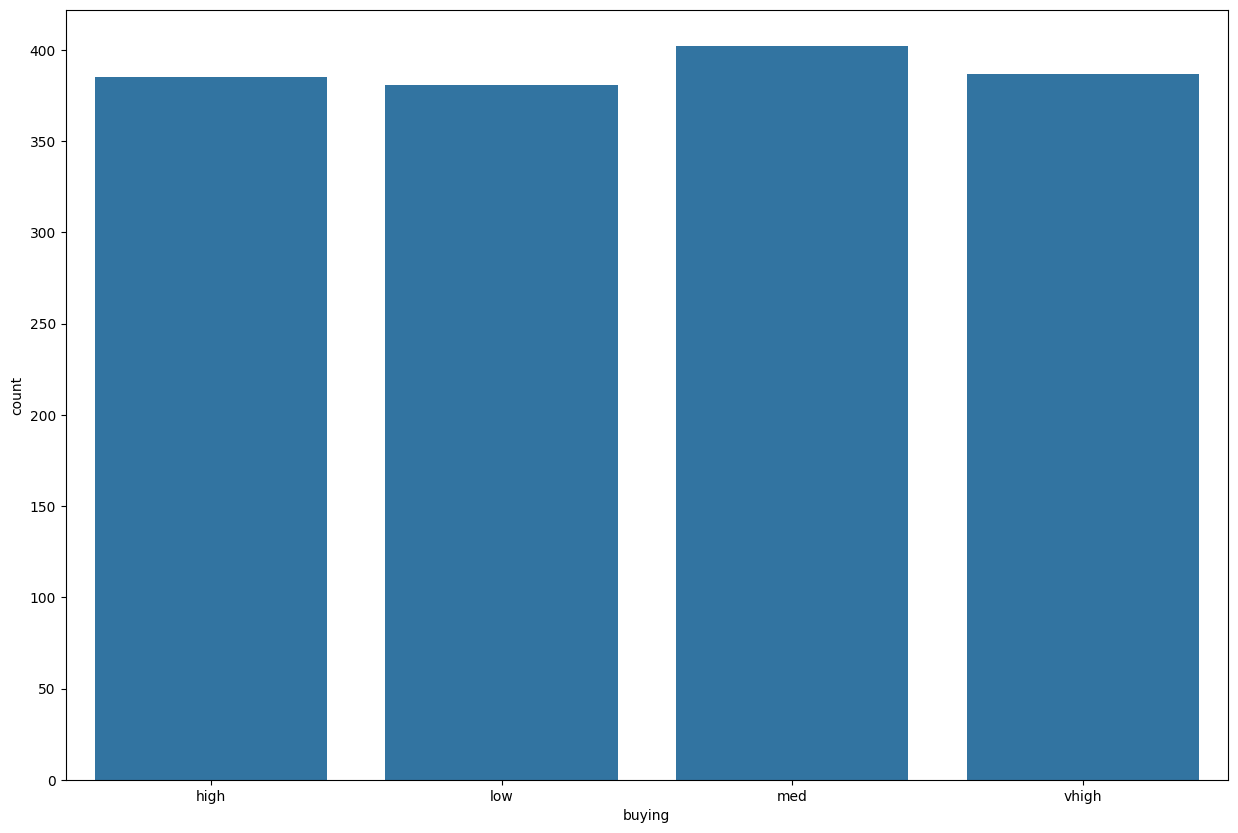

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying')

<Axes: xlabel='buying', ylabel='count'>

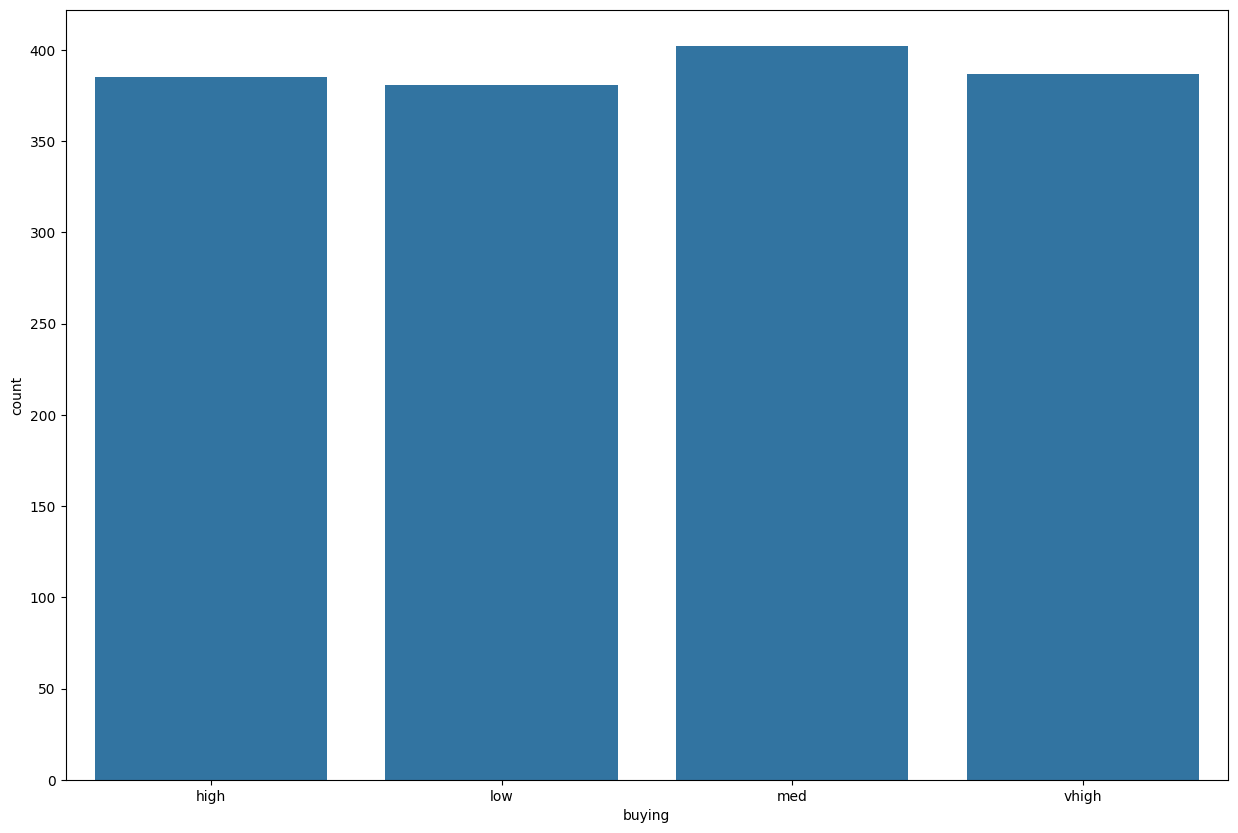

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying')

<Axes: xlabel='buying', ylabel='count'>

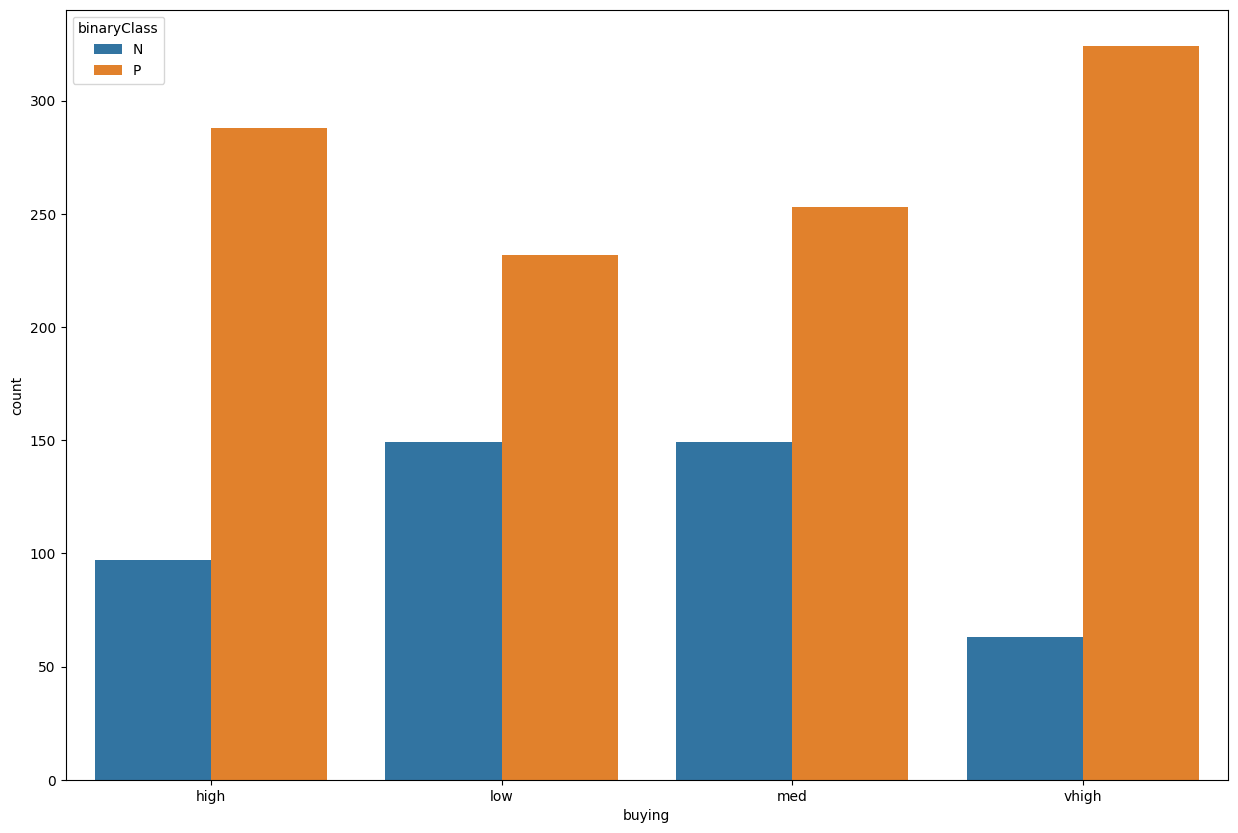

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying', hue='binaryClass')

In [17]:
train_data['maint'].value_counts()

,count
maint,
low,392
med,390
high,387
vhigh,386


In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint')

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint', hue='binaryClass')

In [ ]:
train_data['doors'].value_counts()

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors')

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors', hue='binaryClass')

In [ ]:
train_data['persons'].value_counts()

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='persons', hue='binaryClass')

In [ ]:
train_data['lug_boot'].value_counts()

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='lug_boot', hue='binaryClass')

In [ ]:
train_data['safety'].value_counts()

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='safety', hue='binaryClass')

In [ ]:
train_data['binaryClass'].value_counts()

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='binaryClass')

In [ ]:
car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data[['binaryClass']]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('ord_enc', OrdinalEncoder())

    ])

    car_train_prepared = pipe.fit_transform(car_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_enc = LabelEncoder()

car_labels_prepared = label_enc.fit_transform(car_labels)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

tree_clf.fit(car_train_prepared, car_labels_prepared)

In [ ]:
from sklearn.metrics import accuracy_score

def accuracy(input_data,model,labels):
    """
        Take the input data, model and labels and return accuracy

            """

                preds = model.predict(input_data)
                    acc = accuracy_score(labels,preds)

                        return acc

In [ ]:
from sklearn.metrics import confusion_matrix

def conf_matrix(input_data,model,labels):
    """
        Take the input data, model and labels and return confusion matrix

            """

                preds = model.predict(input_data)
                    cm = confusion_matrix(labels,preds)

                        return cm

IndentationError: unexpected indent (<ipython-input-4-991b95344cc3>, line 9)

In [ ]:
from sklearn.metrics import classification_report

def class_report(input_data,model,labels):
    """
Take the input data, model and labels and return confusion matrix

"""

preds = model.predict(input_data)
report = classification_report(labels,preds)
report = print(report)

return report

In [ ]:
from sklearn.metrics import confusion_matrix

def conf_matrix(input_data,model,labels):
 """
 Take the input data, model and labels and return confusion matrix

"""

preds = model.predict(input_data)
cm = confusion_matrix(labels,preds)

return cm

NameError: name 'model' is not defined

In [ ]:
accuracy(car_train_prepared, tree_clf, car_labels_prepared)

In [ ]:
conf_matrix(car_train_prepared, tree_clf, car_labels_prepared)

In [ ]:
class_report(car_train_prepared, tree_clf, car_labels_prepared)

In [ ]:
tree_clf.get_params()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)),
               'min_samples_split': [0,1,2, 3, 4],
               'min_samples_leaf': [0,1,2, 3, 4],
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
               'max_leaf_nodes':[0,1,2,3,4,5]}

  #refit is true by default. The best estimator is trained on the whole dataset
     grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)

     grid_search.fit(car_train_prepared, car_labels_prepared)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
tree_best = grid_search.best_estimator_

In [ ]:
car_data.columns

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_best, feature_names=car_train.columns, class_names=['N','P']);

In [ ]:
accuracy(car_train_prepared, tree_best, car_labels_prepared)

In [ ]:
conf_matrix(car_train_prepared, tree_best, car_labels_prepared)

In [ ]:
class_report(car_train_prepared, tree_best, car_labels_prepared)

In [ ]:
car_test = test_data.drop('binaryClass', axis=1)
car_test_labels = test_data['binaryClass']

In [ ]:
# Handling the categorical features with the pipeline that we defined early
# We don't fit on the test data. Only transform

car_test_prepared = pipe.transform(car_test)

In [ ]:
 #Handle labels too

 car_test_labels_prepared = label_enc.transform(car_test_labels)

In [ ]:
accuracy(car_test_prepared, tree_best, car_test_labels_prepared)

In [ ]:
conf_matrix(car_test_prepared, tree_best, car_test_labels_prepared)

In [ ]:
class_report(car_test_prepared, tree_best, car_test_labels_prepared)